In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
rainfall = pd.read_csv(r"D:\mumbai-monthly-rains.csv")
rainfall.head()

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
0,1901,13.116602,0.000000,0.000000,3.949669,17.139791,640.714036,888.369692,545.045796,64.271513,9.871696,0.000000,0.000000,2182.478796
1,1902,0.000000,0.000000,0.000000,0.000000,0.355001,247.998782,408.433730,566.595863,688.913455,28.654092,0.488864,19.526547,1960.966334
2,1903,0.000000,0.000000,0.844034,0.000000,220.568740,370.849048,902.447896,602.420828,264.589816,157.892877,0.000000,0.000000,2519.613240
3,1904,0.000000,0.000000,11.381769,0.000000,0.000000,723.081969,390.886799,191.581927,85.704754,38.679948,0.000000,0.000000,1441.317168
4,1905,0.662561,1.713452,0.000000,0.000000,0.000000,123.870892,581.827975,167.382149,172.297723,7.365924,24.903575,0.000000,1080.024250


In [15]:
rainfall.describe()

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,1961.000000,1.567235,0.929358,0.869231,1.428458,18.183632,517.854402,757.407412,465.600818,312.885747,73.983526,13.849462,3.556428,2168.115709
std,35.073732,6.462247,3.077050,2.890032,7.371307,48.628812,251.067016,285.836188,249.072915,205.135368,96.686113,29.689941,12.342390,533.263926
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.058662,103.209194,87.493370,36.313545,0.000000,0.000000,0.000000,1058.840525
25%,1931.000000,0.000000,0.000000,0.000000,0.000000,0.000000,324.094617,540.745923,268.002392,149.584208,9.871696,0.000000,0.000000,1834.996957
50%,1961.000000,0.000000,0.000000,0.000000,0.000000,0.355001,482.449872,788.403637,445.870342,269.276549,43.479170,1.066086,0.000000,2126.054987
75%,1991.000000,0.000000,0.152298,0.000000,0.194165,4.208322,678.040770,942.616099,604.372615,398.645218,98.235161,9.373154,0.176149,2478.558089
max,2021.000000,51.348290,21.107118,18.252996,75.541818,234.392757,1219.518576,1358.833554,1200.956558,987.796660,552.902707,164.348387,90.044602,3563.259531


In [16]:
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    121 non-null    int64  
 1   Jan     121 non-null    float64
 2   Feb     121 non-null    float64
 3   Mar     121 non-null    float64
 4   April   121 non-null    float64
 5   May     121 non-null    float64
 6   June    121 non-null    float64
 7   July    121 non-null    float64
 8   Aug     121 non-null    float64
 9   Sept    121 non-null    float64
 10  Oct     121 non-null    float64
 11  Nov     121 non-null    float64
 12  Dec     121 non-null    float64
 13  Total   121 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 13.4 KB


In [17]:
rainfall.isnull().sum()

Year     0
Jan      0
Feb      0
Mar      0
April    0
May      0
June     0
July     0
Aug      0
Sept     0
Oct      0
Nov      0
Dec      0
Total    0
dtype: int64

In [18]:
rainfall_copy = rainfall.copy()

In [19]:
rainfall_month = rainfall_copy.drop(["Year","Total"],axis=1,inplace=True)

## average precipitation according to months

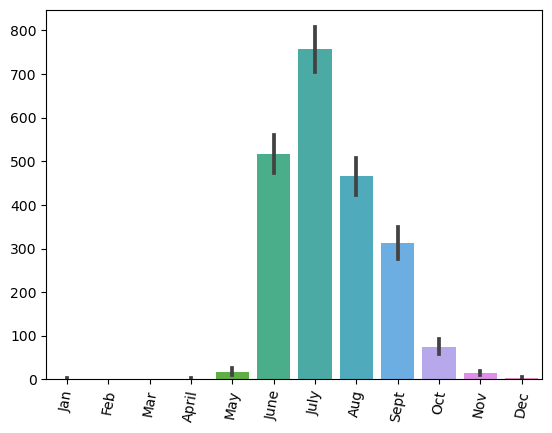

In [21]:
sns.barplot(x=rainfall_month,y=rainfall_month,data=rainfall_copy);
plt.xticks(rotation=80)
plt.show()

## total amount of precipitation by years

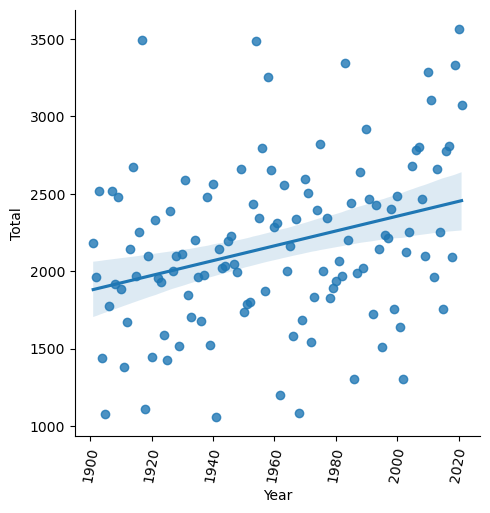

In [25]:
sns.lmplot(x="Year",y="Total",data=rainfall);
plt.xticks(rotation=80)
plt.show()

### Polinomial Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [27]:
y = rainfall.Total.values.reshape(-1, 1)
x = rainfall.Year.values.reshape(-1, 1)

In [28]:
poly_reg = PolynomialFeatures(degree=50)
x_polinomial = poly_reg.fit_transform(x)

In [29]:
lr2 = LinearRegression()
lr2.fit(x_polinomial, y)

LinearRegression()

In [30]:
Predict_Array = np.array([2022,2023,2024,2025,2026,2027,2028,2029,2030]).reshape(-1,1)
Predict_Array_poly = poly_reg.fit_transform(Predict_Array)
y_head2 = lr2.predict(Predict_Array_poly)

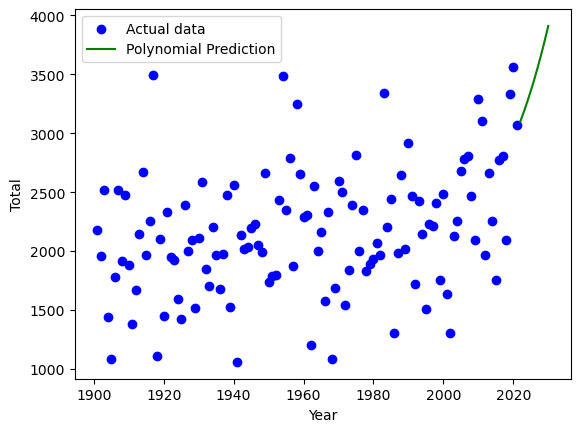

In [31]:
plt.scatter(x, y, color="blue", label="Actual data")
plt.plot(Predict_Array, y_head2, color="g", label="Polynomial Prediction")
plt.xlabel("Year")
plt.ylabel("Total")
plt.legend()
plt.show()

## Random Forest Regression

In [57]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=400, random_state=42) # 100 tane tree kullandık
rf.fit(x,y)
y_head = rf.predict(x)

In [58]:
from sklearn.metrics import r2_score

print("Random Forest Regression Score : ", r2_score(y,y_head))

Random Forest Regression Score :  0.8232395790177651


In [61]:
print('Accuracy of the model is ', np.round((r2_score(y,y_head))*100,2),'%' )

Accuracy of the model is  82.32 %
